In [1]:
import pandas as pd
#rgp_dict={}
#df_rgp = pd.read_csv('etab.csv', sep=';')
#for row in df_rgp.itertuples():
#   rgp_dict[row.raw] = row.etab

In [2]:
df_etab = pd.read_excel('les_institutions_fr5.xlsx')

In [3]:
dic_id_paysage_RGP = {'PpsCQ':'Université Paris sciences et lettres',
                      'RS4WF':'CY Cergy Paris Université',
                      'kYR50':'Institut polytechnique de Paris',
                      'qUCQp':'Nantes Université',
                      'bxPQe':'Sorbonne Université',
                      'LorStr':'Strasbourg/Lorraine',
                      'K4lR3':'Université Clermont Auvergne',
                      's3t8T':"Université Côte d'Azur",
                      'U8a0v':'Université de Lille',
                      'evv7S':'Université de Montpellier',
                      '91D9w':'Université de Rennes',
                      '4a8B2':'Université de Toulouse',
                      'Y7ch7':'Université Grenoble Alpes',
                      '3Z5e6':'Université Gustave Eiffel',
                      '5cZyU':'Université Paris Cité',
                      'TWBzp':'Université Paris-Panthéon-Assas',
                      'G2qA7':'Université Paris-Saclay',
                      'EW53M':'Université Polytechnique Hauts-de-France'
}

In [124]:
etab_dict={}
for row in df_etab.itertuples():
    key = f'{row.year}##{row.institution_id}'
    rgp = row.uo_lib
    is_tracked = False
    if isinstance(row.id_paysage_RGP, str) and row.id_paysage_RGP in dic_id_paysage_RGP:
        rgp = dic_id_paysage_RGP[row.id_paysage_RGP]
        is_tracked = True
    if rgp in list(dic_id_paysage_RGP.values()):
        is_tracked = True
    #if isinstance(row.id_paysage_RGP, str) and row.id_paysage_RGP not in dic_id_paysage_RGP:
    #    print(row.id_paysage_RGP)
    etab_dict[key] = {'uo_lib': row.uo_lib, 'id_paysage_RGP': rgp, 'is_tracked': is_tracked}

In [126]:
agg_data_raw = {}
agg_data_etab = {}
agg_total = {}
for year in range(2018, 2024):
    print(f'reading {year}')
    df = pd.read_json(f'publications_ai_fr_{year}.jsonl', lines=True, orient='records')
    
    for row in df.itertuples():
        current_id = row.id.split('/')[-1]
        for a in row.authorships:
            for inst in a.get('institutions'):
                key = f"{year}##{inst['id']}"
                if key not in etab_dict:
                    continue
                current_info = etab_dict[key]
                uo_lib = current_info['uo_lib']
                id_paysage_RGP = current_info['id_paysage_RGP']
                is_tracked = current_info['is_tracked']
                
                if f'{year}##total' not in agg_total:
                    agg_total[f'{year}##total'] = {'year':year, 'publications': set([]), 'is_tracked':False}
                agg_total[f'{year}##total']['publications'].add(current_id)
                
                ####

                if f'{year}##{uo_lib}' not in agg_data_raw:
                    agg_data_raw[f'{year}##{uo_lib}'] = {'year':year, 'uo_lib':uo_lib, 'publications': set([]), 'is_tracked':is_tracked}
                agg_data_raw[f'{year}##{uo_lib}']['publications'].add(current_id)
                
                #######
            
                
                if f'{year}##{id_paysage_RGP}' not in agg_data_etab:
                    agg_data_etab[f'{year}##{id_paysage_RGP}'] = {'year':year, 'id_paysage_RGP':id_paysage_RGP, 'publications': set([]), 'is_tracked':is_tracked}
                agg_data_etab[f'{year}##{id_paysage_RGP}']['publications'].add(current_id)
                

            
                
                

reading 2018
reading 2019
reading 2020
reading 2021
reading 2022
reading 2023


In [132]:
for e in agg_total:
    agg_total[e]['nb_publications'] = len(agg_total[e]['publications'])
for e in agg_data_raw:
    agg_data_raw[e]['nb_publications'] = len(agg_data_raw[e]['publications'])
for e in agg_data_etab:
    agg_data_etab[e]['nb_publications'] = len(agg_data_etab[e]['publications'])

In [133]:
df_raw = pd.DataFrame(list(agg_data_raw.values())).sort_values(by='nb_publications', ascending=False)
df_rgp = pd.DataFrame(list(agg_data_etab.values())).sort_values(by='nb_publications', ascending=False)

In [134]:
df_raw['fr_share'] = None
for ix, row in df_raw.iterrows():
    df_raw.at[ix, 'fr_share'] = int(10000*row.nb_publications / (agg_total[f'{row.year}##total']['nb_publications']))/100

df_rgp['fr_share'] = None
for ix, row in df_rgp.iterrows():
    df_rgp.at[ix, 'fr_share'] = int(10000*row.nb_publications / (agg_total[f'{row.year}##total']['nb_publications']))/100


# Top établissement 2022

In [135]:
def format_label(x):
    current_str=''
    res=[]
    for c in x.split(' '):
        if len(current_str)<15:
            current_str+=c+' '
        else:
            res.append(current_str)
            current_str=c+' '
    res.append(current_str)
    return '\n'.join(res).strip()
            
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
SIZE = 22
SMALL_SIZE=18
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title       

In [136]:
organismes=['Centre national de la recherche scientifique', 
            'Institut national de la santé et de la recherche médicale', 
           'Institut national de recherche en sciences et technologies du numérique',
           'Commissariat à l’énergie atomique et aux énergies alternatives',
           "Institut national de recherche pour l'agriculture, l'alimentation et l'environnement",
           "Institut de recherche pour le développement"]
color_dict = {}
color_dict['Université Paris-Saclay'] = '#63003C'
color_dict['Sorbonne Université'] = '#042f66'
color_dict['Université Grenoble Alpes'] = '#FF4E01'
color_dict['Institut Polytechnique de Paris'] = 'black'
color_dict['Université Paris sciences et lettres']='#2F3B89'
color_dict['Université de Lorraine'] ='#FFF044'
color_dict['Université de Toulouse'] = '#BE2125'
color_dict['University of Rennes'] = 'black'
color_dict["Université Côte d'Azur"] = "#007FA5"
color_dict['University of Strasbourg'] = '#303030'


In [147]:
year = 2023
#df_2022 = df_rgp[(df_rgp.year==year) & (df_rgp.is_tracked == True)]
df_2022 = df_rgp[(df_rgp.year==year)]
TOP = 20
top_etab = [{'etab': x, 'label': format_label(x)} for x in df_2022.head(100).id_paysage_RGP.to_list()]
top_shares = df_2022.head(100).fr_share.to_list()
top_count = df_2022.head(100)['nb_publications'].to_list()

top_etab_filtered, top_shares_filtered, top_count_filtered = [], [], []
for ix, t in enumerate(top_etab):
    if len(top_etab_filtered) == TOP:
        break
    if t['label'] not in [format_label(o) for o in organismes]:
        top_etab_filtered.append(t)
        top_shares_filtered.append(top_shares[ix])
        top_count_filtered.append(top_count[ix])
    else:
        pass
    
colors = ['grey']*TOP
for ix, etab in enumerate(top_etab_filtered):
    if etab['etab'] in color_dict:
        colors[ix] = color_dict[etab['etab']]
#colors

<ipython-input-148-64769fbc2eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)


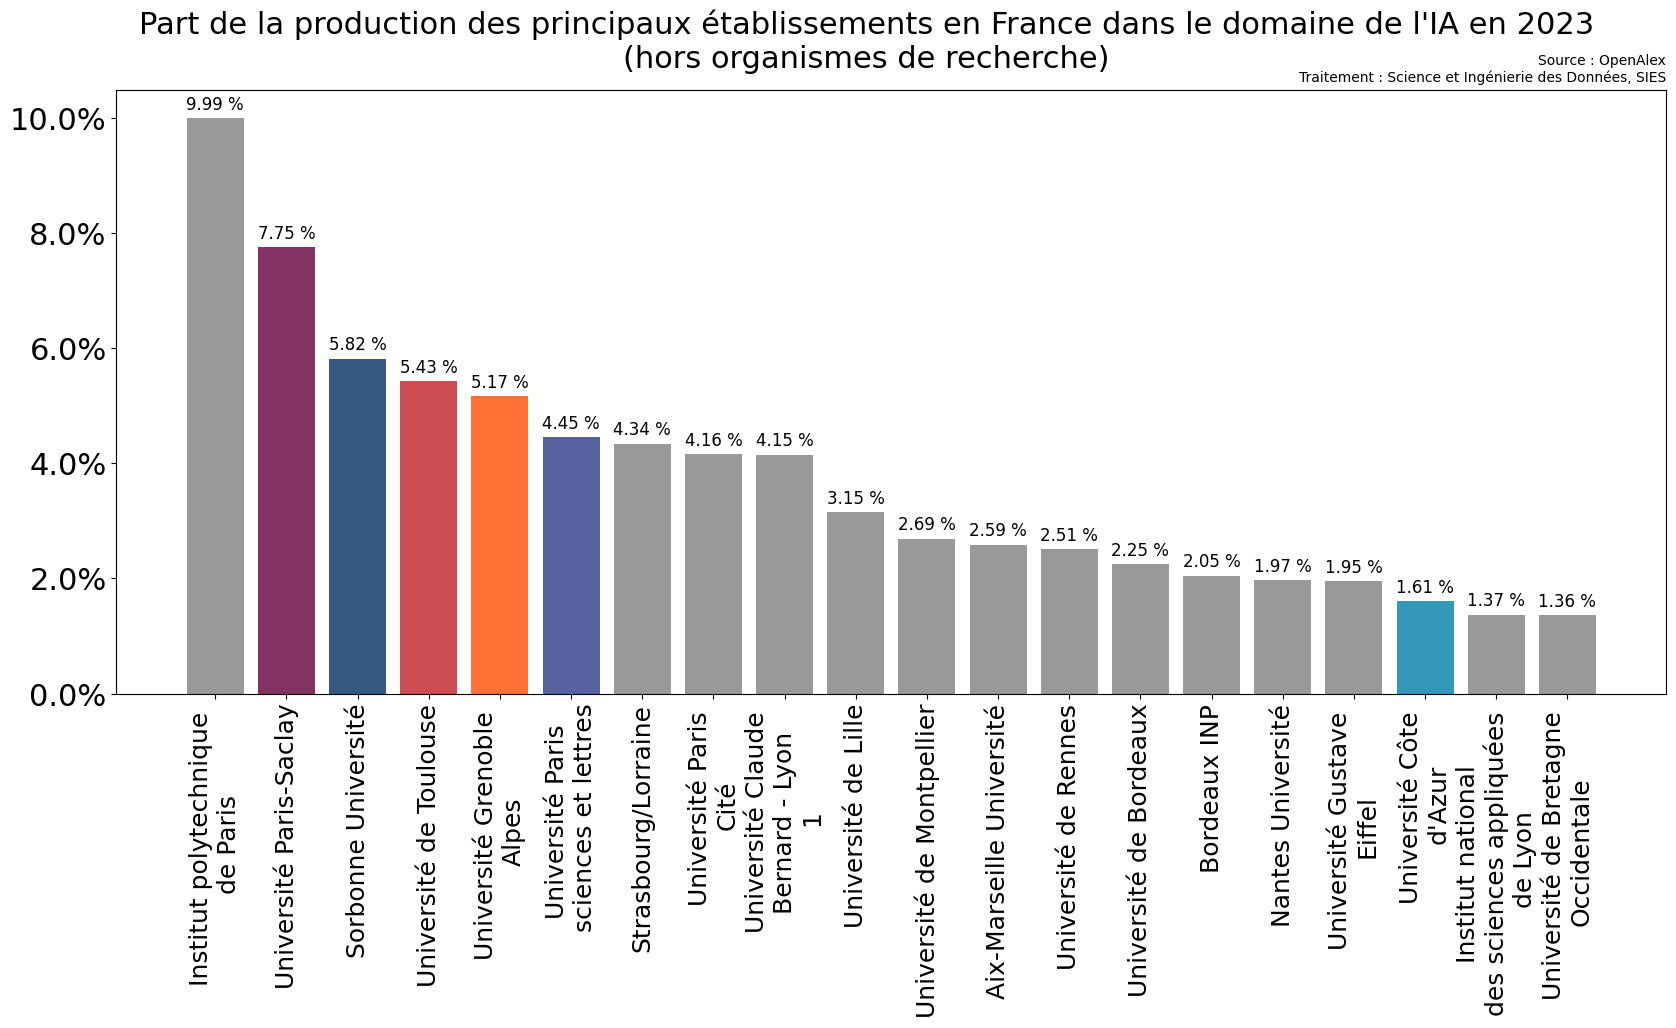

In [148]:
fig, ax = plt.subplots(figsize=(20,8), dpi=100)

ax.bar([e['label'] for e in top_etab_filtered], top_shares_filtered, 
       alpha=0.8, color=colors
      )
plt.suptitle(f"Part de la production des principaux établissements en France dans le domaine de l'IA en {year}\n(hors organismes de recherche)")
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)
for i in range(len(top_etab_filtered)):
    plt.text(i, top_shares_filtered[i]+0.15, str(top_shares_filtered[i])+' %', ha = 'center', fontsize=12)